In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('3.concertriccir2.csv')
df.rename(columns={'7.003345706103683010e-01': 'X','-2.470675778972781789e-01': 'Y','0.000000000000000000e+00': 'class'}, inplace=True)
df.head()

,X,Y,class
0,-3.950019,2.740080,1.0
1,0.150222,-2.157638,1.0
2,-1.672050,-0.941519,1.0
3,2.560483,-1.846577,1.0
4,-1.724979,3.463930,1.0


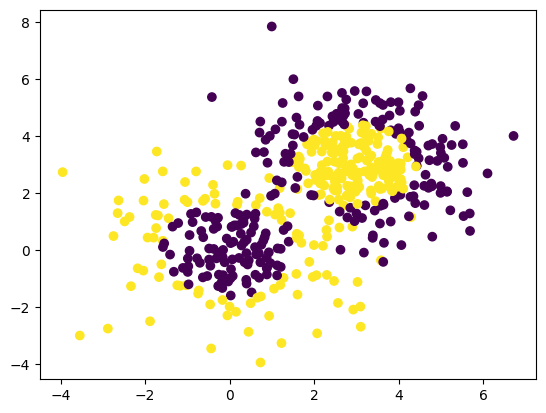

In [7]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [8]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [9]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [10]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
history1 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200


13/13 [==============================] - 1s 21ms/step - loss: 0.9292 - accuracy: 0.4687 - val_loss: 0.7534 - val_accuracy: 0.5700
Epoch 2/200
13/13 [==============================] - 0s 4ms/step - loss: 0.8761 - accuracy: 0.4637 - val_loss: 0.6988 - val_accuracy: 0.5700
Epoch 3/200
13/13 [==============================] - 0s 5ms/step - loss: 0.8320 - accuracy: 0.4511 - val_loss: 0.6610 - val_accuracy: 0.5700
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 0.7985 - accuracy: 0.4236 - val_loss: 0.6358 - val_accuracy: 0.5600
Epoch 5/200
13/13 [==============================] - 0s 5ms/step - loss: 0.7723 - accuracy: 0.4411 - val_loss: 0.6222 - val_accuracy: 0.5400
Epoch 6/200
13/13 [==============================] - 0s 5ms/step - loss: 0.7546 - accuracy: 0.4762 - val_loss: 0.6161 - val_accuracy: 0.6200
Epoch 7/200
13/13 [==============================] - 0s 5ms/step - loss: 0.7421 - accuracy: 0.5514 - val_loss: 0.6157 - val_accuracy: 0.5500
Epoch 8/20

In [13]:
model = Sequential()

model.add(Dense(3,activation='relu',input_dim=2))
model.add(BatchNormalization())
model.add(Dense(2,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3)                 9         
                                                                 
 batch_normalization (Batch  (None, 3)                 12        
 Normalization)                                                  
                                                                 
 dense_4 (Dense)             (None, 2)                 8         
                                                                 
 batch_normalization_1 (Bat  (None, 2)                 8         
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 30 (1

In [14]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
history2 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 [==============================] - 2s 22ms/step - loss: 0.7249 - accuracy: 0.5589 - val_loss: 0.6973 - val_accuracy: 0.4500
Epoch 2/200
13/13 [==============================] - 0s 5ms/step - loss: 0.7200 - accuracy: 0.5815 - val_loss: 0.6986 - val_accuracy: 0.4700
Epoch 3/200
13/13 [==============================] - 0s 5ms/step - loss: 0.6887 - accuracy: 0.5965 - val_loss: 0.6980 - val_accuracy: 0.4700
Epoch 4/200
13/13 [==============================] - 0s 5ms/step - loss: 0.6954 - accuracy: 0.5789 - val_loss: 0.6968 - val_accuracy: 0.4900
Epoch 5/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6726 - accuracy: 0.6165 - val_loss: 0.6963 - val_accuracy: 0.5000
Epoch 6/200
13/13 [==============================] - 0s 5ms/step - loss: 0.6672 - accuracy: 0.6140 - val_loss: 0.6955 - val_accuracy: 0.5100
Epoch 7/200
13/13 [==============================] - 0s 5ms/step - loss: 0.6521 - accuracy: 0.6642 - val_loss: 0.6938 - val_accuracy: 0.5100
Epoch 8/200


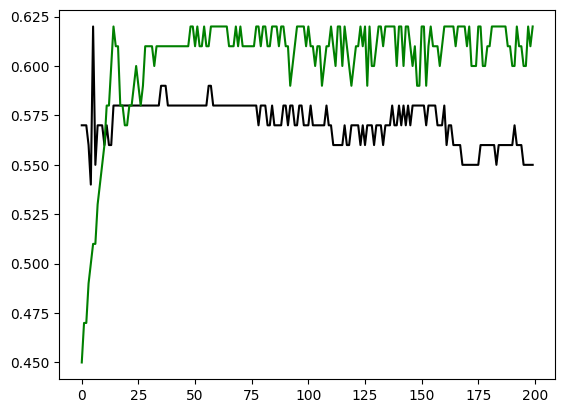

In [16]:
plt.plot(history1.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='green')